# Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler, BatchSampler
import numpy as np

In [2]:
train_data = pd.read_csv("./train.csv").dropna()
test_data = pd.read_csv("./test.csv").dropna()

In [3]:
type(train_data)

pandas.core.frame.DataFrame

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [6]:
type(train_data['Age'])

pandas.core.series.Series

In [7]:
torch.tensor(train_data['Age'].values)

tensor([38.0000, 35.0000, 54.0000,  4.0000, 58.0000, 34.0000, 28.0000, 19.0000,
        49.0000, 65.0000, 45.0000, 29.0000, 25.0000, 23.0000, 46.0000, 71.0000,
        23.0000, 21.0000, 47.0000, 24.0000, 32.5000, 54.0000, 19.0000, 37.0000,
        24.0000, 36.5000, 22.0000, 61.0000, 56.0000, 50.0000,  1.0000,  3.0000,
        44.0000, 58.0000,  2.0000, 40.0000, 31.0000, 32.0000, 38.0000, 35.0000,
        44.0000, 37.0000, 29.0000, 62.0000, 30.0000, 52.0000, 40.0000, 58.0000,
        35.0000, 37.0000, 63.0000, 19.0000, 36.0000,  2.0000, 50.0000,  0.9200,
        17.0000, 30.0000, 24.0000, 18.0000, 31.0000, 40.0000, 36.0000, 36.0000,
        16.0000, 45.5000, 38.0000, 29.0000, 41.0000, 45.0000,  2.0000, 24.0000,
        24.0000, 22.0000, 60.0000, 24.0000, 25.0000, 27.0000, 36.0000, 23.0000,
        24.0000, 33.0000, 32.0000, 28.0000, 50.0000, 14.0000, 64.0000,  4.0000,
        52.0000, 30.0000, 49.0000, 65.0000, 48.0000, 47.0000, 23.0000, 25.0000,
        35.0000, 58.0000, 55.0000, 54.00

In [8]:
len(torch.tensor(train_data['Age'].values))

183

In [9]:
print(train_data.shape)
print(test_data.shape)

(183, 12)
(87, 11)


In [10]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
print(f"Total rows = {train_data.shape[0]}")
print("No of unique:")
print()
for column in train_data.columns:
	print(f"{column} = {train_data[column].unique().shape}")

Total rows = 183
No of unique:

PassengerId = (183,)
Survived = (2,)
Pclass = (3,)
Name = (183,)
Sex = (2,)
Age = (63,)
SibSp = (4,)
Parch = (4,)
Ticket = (127,)
Fare = (93,)
Cabin = (133,)
Embarked = (3,)


In [12]:
sexdict = {}
ticketdict = {}
cabindict = {}
embarkeddict = {}

for i,item in enumerate(train_data['Sex'].unique()):
    sexdict[item] = i
for i,item in enumerate(train_data['Ticket'].unique()):
    ticketdict[item] = i
for i,item in enumerate(train_data['Cabin'].unique()):
    cabindict[item] = i
for i,item in enumerate(train_data['Embarked'].unique()):
    embarkeddict[item] = i
train_data['Sex'] = train_data['Sex'].replace(sexdict)
train_data['Ticket'] = train_data['Ticket'].replace(ticketdict)
train_data['Cabin'] = train_data['Cabin'].replace(cabindict)
train_data['Embarked'] = train_data['Embarked'].replace(embarkeddict)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,71.2833,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,1,53.1000,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,2,51.8625,2,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,3,16.7000,3,1
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,4,26.5500,4,1


In [13]:
embarkeddict

{'C': 0, 'S': 1, 'Q': 2}

In [14]:
torch.tensor(train_data[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].values)

tensor([[  1.0000,   0.0000,  38.0000,  ...,  71.2833,   0.0000,   0.0000],
        [  1.0000,   0.0000,  35.0000,  ...,  53.1000,   1.0000,   1.0000],
        [  1.0000,   1.0000,  54.0000,  ...,  51.8625,   2.0000,   1.0000],
        ...,
        [  1.0000,   0.0000,  56.0000,  ...,  83.1583, 130.0000,   0.0000],
        [  1.0000,   0.0000,  19.0000,  ...,  30.0000, 131.0000,   1.0000],
        [  1.0000,   1.0000,  26.0000,  ...,  30.0000, 132.0000,   0.0000]],
       dtype=torch.float64)

In [15]:
# Train Val Split
# mask = np.random.choice([0,1],size=len(train_data),p=[0.3,0.7])
# print(mask.sum()/len(train_data))
# train_df = train_data[mask]
# val_df = train_data[~mask]
# print(len(train_df))
# print(len(val_df))

In [16]:
train_df = train_data.sample(frac=0.8)
val_df = train_data.drop(train_df.index)
print(len(train_df))
print(len(val_df))
print(len(train_data))
train_df

146
37
183


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",1,28.0,0,0,6,35.5000,6,1
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",0,48.0,1,0,88,39.6000,87,0
645,646,1,1,"Harper, Mr. Henry Sleeper",1,48.0,1,0,8,76.7292,8,0
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",0,40.0,1,1,53,134.5000,52,0
21,22,1,2,"Beesley, Mr. Lawrence",1,34.0,0,0,5,13.0000,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,610,1,1,"Shutes, Miss. Elizabeth W",0,40.0,0,0,41,153.4625,40,1
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",0,39.0,1,1,87,110.8833,89,0
512,513,1,1,"McGough, Mr. James Robert",1,36.0,0,0,79,26.2875,79,1
269,270,1,1,"Bissette, Miss. Amelia",0,35.0,0,0,42,135.6333,41,1


In [17]:
class Dataset():
    def __init__(self, df):
        # self.x = torch.tensor(df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].values,dtype=float)
        self.x = torch.tensor(df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values,dtype=float)
        self.y = torch.tensor(df['Survived'].values,dtype=int)
    def __len__(self): return len(self.y)
    def __getitem__(self, i): return self.x[i],self.y[i]

In [18]:
train_ds,val_ds = Dataset(train_df),Dataset(val_df)
assert len(train_ds)==len(train_df)
assert len(val_ds)==len(val_df)

In [19]:
xb,yb = train_ds[0:5]
print(xb.shape)
print(yb.shape)
xb,yb

torch.Size([5, 7])
torch.Size([5])


(tensor([[  1.0000,   1.0000,  28.0000,   0.0000,   0.0000,  35.5000,   1.0000],
         [  1.0000,   0.0000,  48.0000,   1.0000,   0.0000,  39.6000,   0.0000],
         [  1.0000,   1.0000,  48.0000,   1.0000,   0.0000,  76.7292,   0.0000],
         [  1.0000,   0.0000,  40.0000,   1.0000,   1.0000, 134.5000,   0.0000],
         [  2.0000,   1.0000,  34.0000,   0.0000,   0.0000,  13.0000,   1.0000]],
        dtype=torch.float64),
 tensor([1, 1, 1, 1, 1]))

In [20]:
inp = torch.randn(10,3,dtype=float).requires_grad_()
w1 = torch.randn(3,5,dtype=float).requires_grad_()
print(w1)
drop = torch.tensor(np.random.choice([0,1], size=w1.shape[1], p=[0.2,0.8]))
print(drop)
res = torch.mul(w1,drop[None,:])
print(res)
print(inp@res)


tensor([[ 1.3229e+00,  6.3144e-01,  1.7547e-03,  1.7582e+00,  1.0038e-01],
        [-9.1348e-01,  1.2946e+00, -1.2020e+00,  3.0924e-01,  2.2605e+00],
        [ 5.3095e-01, -2.0284e-01, -9.8212e-01, -1.3727e+00, -1.2953e+00]],
       dtype=torch.float64, requires_grad=True)
tensor([1, 1, 0, 1, 1])
tensor([[ 1.3229,  0.6314,  0.0000,  1.7582,  0.1004],
        [-0.9135,  1.2946, -0.0000,  0.3092,  2.2605],
        [ 0.5309, -0.2028, -0.0000, -1.3727, -1.2953]], dtype=torch.float64,
       grad_fn=<MulBackward0>)
tensor([[ 0.4437, -0.2975,  0.0000, -2.2824, -1.6947],
        [-1.2608,  1.8033,  0.0000,  4.4931,  4.8851],
        [-0.3799, -0.4757,  0.0000, -1.8183, -0.8786],
        [ 1.2622,  1.3621,  0.0000, -0.5783, -0.1397],
        [ 4.5469,  0.7044,  0.0000,  1.4766, -3.0380],
        [-1.5780,  2.2252,  0.0000,  1.3494,  4.2448],
        [-1.1676,  1.2438,  0.0000, -0.8792,  1.9435],
        [-0.0882, -1.5770,  0.0000, -0.7881, -1.7804],
        [-2.3634,  0.9877,  0.0000, -0.4445,

In [21]:
class Linear(nn.Module):
    def __init__(self, n_in, n_out, p, q):
        super().__init__()
        self.w1 = torch.randn(n_in,n_out,dtype=float).requires_grad_()
        self.w2 = torch.randn(p,q,dtype=float).requires_grad_()
        self.b = torch.zeros(n_out,dtype=float).requires_grad_()
    def forward(self, inp):
        return torch.einsum('ab,bc,pq->acpq', (inp, self.w1, self.w2)) + self.b[None,:,None,None]
    def parameters(self):
        return (self.w1,self.w2)

In [22]:
# fwd = Linear(9,5,2,3)
# op = fwd(xb)
# print(op.shape)
# print(op)

In [23]:
# fwd.b

In [24]:
# temp = torch.einsum('abcd->ab',op)
# temp

In [25]:
class Dropout(nn.Module):
    def __init__(self, p=0.5):
        super().__init__()
        self.p = p
    def forward(self, inp):
        if self.training: inp = inp.mul(torch.tensor(np.random.choice([0,1], size=inp.shape[1], p=[self.p,1-self.p])))
        return inp

In [26]:
inp = torch.randn(10,3,dtype=float).requires_grad_()
test = Dropout(0.3)

In [27]:
test.train()
test(inp)

tensor([[ 0.4621, -0.2130, -0.2217],
        [-0.0855, -1.5616, -1.0800],
        [-0.0319,  0.9206,  0.5428],
        [-0.2332,  1.2532,  0.1712],
        [ 0.6363,  0.0658, -0.1382],
        [ 0.0219,  0.5588, -0.1841],
        [ 0.6196,  0.2055, -0.2327],
        [ 0.9443,  1.4848,  0.5614],
        [-0.2622,  0.6972,  0.6506],
        [ 0.7634,  0.5284,  1.8743]], dtype=torch.float64,
       grad_fn=<MulBackward0>)

In [28]:
class ReLU_Sum(nn.Module):
    def __init__(self,clamp=1):
        super().__init__()
        self.clamp = clamp
    def forward(self,inp):
        if self.clamp:
            # return torch.einsum('abcd->ab',inp).clamp(min=0)/(inp.shape[2]*inp.shape[3])
            # return torch.einsum('abcd->ab',inp).clamp(min=0)
            return torch.mean(inp,dim=[2,3]).clamp(min=0)
        else:
            # return torch.einsum('abcd->ab',inp)/(inp.shape[2]*inp.shape[3])
            # return torch.einsum('abcd->ab',inp)
            return torch.mean(inp,dim=[2,3])

In [29]:
# actfn = ReLU_Sum()
# temp = actfn(op)
# temp,temp.shape

In [30]:
# n_in = 9
# nh = 15
# n_out = 1
# p = 5
# q = 5
# xb1 = xb
# layers = [Linear(n_in,nh,p,q),ReLU_Sum(),Linear(nh,n_out,p,q),ReLU_Sum(0)]
# for l in layers: xb1 = l(xb1)
# print(xb.shape)
# print(yb[:,None].shape)
# F.mse_loss(xb,yb[:,None])

In [31]:
class Model(nn.Module):
    def __init__(self, layers):
        super().__init__()
        # self._modules = {}
        # self.layers = nn.ModuleList([Linear(n_in,nh,p,q),ReLU_Sum(),Linear(nh,n_out,p,q),ReLU_Sum(0)])
        self.layers = layers
        # self.l1 = Linear(n_in,nh,p,q)
        # self.r1 = ReLU_Sum()
        # self.l2 = Linear(nh,n_out,p,q)
        # self.r2 = ReLU_Sum(0)

    # def __setattr__(self,k,v):
    #     if not k.startswith("_"): self._modules[k] = v
    #     super().__setattr__(k,v)

    # def __repr__(self): return f'{self._modules}'

    def parameters(self):
        for l in self.layers: yield from l.parameters()
        # for l in self._modules.values(): yield from l.parameters()
        
    # def __call__(self, x, targ):
    def __call__(self, x):
        for l in self.layers: x = l(x)
        # for l in self._modules.values(): x = l(x)
        # return F.mse_loss(x,targ[:,None])
        return x

In [32]:
# def collate(b):
#     xs,ys = zip(*b)
#     return torch.stack(xs),torch.stack(ys)

In [33]:
# train_samp = BatchSampler(RandomSampler(train_ds), 50, drop_last=False)
# val_samp = BatchSampler(SequentialSampler(val_ds), 50, drop_last=False)

In [34]:
# train_dl = DataLoader(train_ds, batch_sampler=train_samp, collate_fn=collate)
# val_dl = DataLoader(val_ds, batch_sampler=val_samp, collate_fn=collate)

In [35]:
# train_dl = DataLoader(train_ds, sampler=train_samp)
# val_dl = DataLoader(val_ds, sampler=val_samp)

In [36]:
# xb,yb = next(iter(val_dl))
# xb.shape,yb.shape

In [37]:
# model = Model(9,15,1,5,5)
# loss = model(xb,yb)
# print(loss)
# loss.backward()

In [38]:
# l0 = model.layers[0]
# print(l0.b.grad)

In [39]:
# model = Model(9,15,2,5,5)
# pred = model(train_ds.x)
# pred.shape

In [40]:
# pred

In [41]:
# loss_func(pred,train_ds.y)

In [42]:
# pred.argmax(dim=1)

In [43]:
def accuracy(out, targ): return (out.argmax(dim=1)==targ).float().mean()

In [44]:
# accuracy(pred, train_ds.y)

In [45]:
def report(loss, preds, yb):
	acc = accuracy(preds, yb)
	print(f'{loss}, {acc}')
	return acc

In [46]:
# xb,yb = train_ds.x[:bs],train_ds.y[:bs]
# preds = model(xb)
# report(loss_func(preds, yb), preds, yb)

In [47]:
# list(model.named_children())

In [48]:
# list(model.parameters())[2].shape

In [49]:
# model

In [68]:
def get_model(p1,p2):
    layers = nn.ModuleList([Linear(7,15,3,3),
                   ReLU_Sum(),
                   Dropout(p1),
                   Linear(15,2,3,3),
                   ReLU_Sum(0),
                   Dropout(p2)])
    model = Model(layers)
    return model

In [69]:
# model= get_model()
# loss_func(model(xb), yb)

In [70]:
# opt = optim.SGD(model.parameters(), lr=lr)

In [71]:
# s = slice(0, 50)
# xb,yb = train_ds.x[s],train_ds.y[s]
# preds = model(xb)
# loss = loss_func(preds, yb)

In [72]:
# print(xb.shape,yb.shape)
# print((preds[:,1]>preds[:,0]).float().mean())
# print(loss)

In [73]:
# loss.backward()

In [74]:
# # list(model.parameters())[0]
# list(model.parameters())[0].grad

In [75]:
# opt.step()
# list(model.parameters())[0]
# # list(model.parameters())[0].grad

In [76]:
# opt.zero_grad()
# list(model.parameters())[0].grad

In [77]:
# lr = 0.05
# epochs = 100
# bs = 100
# n = len(train_ds)

# model= get_model()
# opt = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
# sch = optim.lr_scheduler.ExponentialLR(opt, 0.99)
# loss_hist = []
# valloss_hist = []
# acc_hist = []
# valacc_hist = []

# for epoch in range(epochs):
#     for i in range(0, n, bs):
#         s = slice(i, min(n,i+bs))
#         xb,yb = train_ds.x[s],train_ds.y[s]
#         preds = model(xb)
#         loss = loss_func(preds, yb)
#         loss_hist.append(loss.detach().numpy())
#         loss.backward()
#         opt.step()
#         opt.zero_grad()
#     sch.step()
#     acc_hist.append(report(loss, preds, yb))
#     if(epoch%5==0):
#         print("VAL:")
#         with torch.no_grad():
#             xb,yb = val_ds.x,val_ds.y
#             preds = model(xb)
#             loss = loss_func(preds, yb)
#             valloss_hist.append(loss.detach().numpy())
#             valacc_hist.append(report(loss, preds, yb))

In [78]:
# plt.plot(loss_hist)
# plt.plot(valloss_hist)

In [79]:
# plt.plot(acc_hist)
# plt.plot(valacc_hist)

In [80]:
def fit(epochs, model, loss_func, opt, sch, train_dl, valid_dl, verbose=False):
    
    loss_hist = []
    valloss_hist = []
    valacc_hist = []
    # best_params = None
    # best_acc = 0
    
    for epoch in range(epochs):
        model.train()
        tot_loss,count = 0.,0
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb)
            n = len(xb)
            count += n
            tot_loss += loss.item()*n
            loss.backward()
            opt.step()
            opt.zero_grad()
            
        loss_hist.append(tot_loss/count)

        model.eval()
        with torch.no_grad():
            tot_loss,tot_acc,count = 0.,0.,0
            for xb,yb in valid_dl:
                pred = model(xb)
                n = len(xb)
                count += n
                tot_loss += loss_func(pred,yb).item()*n
                tot_acc  += accuracy (pred,yb).item()*n
        
        acc = tot_acc/count
        valloss_hist.append(tot_loss/count)
        valacc_hist.append(tot_acc/count)
        if verbose:
            print(epoch, tot_loss/count, tot_acc/count)

        # if(acc>best_acc):
        #     best_acc = acc
        #     best_params = model.parameters()
        #     print(f"New best model with acc = {acc}")

        sch.step()
    # return (loss_hist,valloss_hist,valacc_hist,best_params,best_acc)
    return (loss_hist,valloss_hist,valacc_hist)

In [81]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, shuffle=False, **kwargs))

In [82]:
bs = 100
train_dl,valid_dl = get_dls(train_ds, val_ds, bs)

In [83]:
model = get_model(0.2,0.4)

In [84]:
for p in model.parameters(): print(p.shape)

torch.Size([7, 15])
torch.Size([3, 3])
torch.Size([15, 2])
torch.Size([3, 3])


In [85]:
lr = 0.5
epochs = 500
opt = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-7)
sch = optim.lr_scheduler.ExponentialLR(opt, 0.999)
loss_func = F.cross_entropy

%time lh,vlh,vah = fit(epochs, model, loss_func, opt, sch, train_dl, valid_dl)

CPU times: user 1.13 s, sys: 108 ms, total: 1.24 s
Wall time: 1.2 s


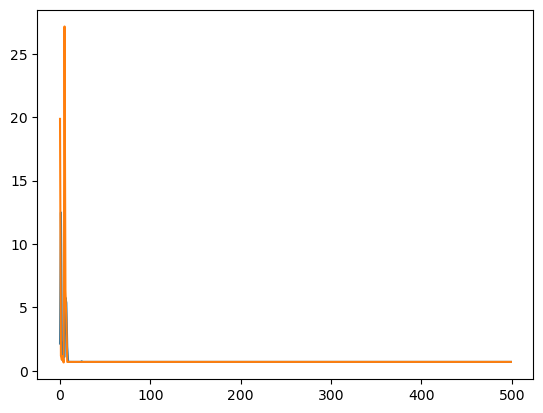

In [86]:
plt.plot(lh)
plt.plot(vlh)

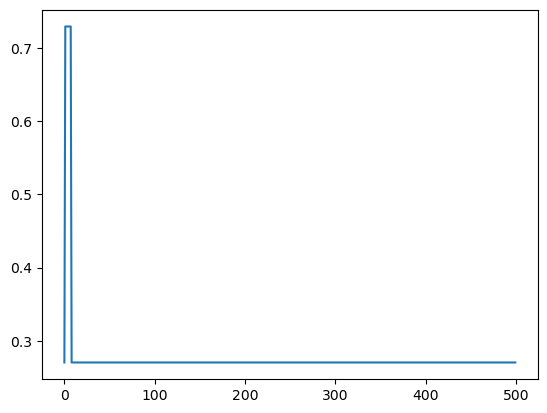

In [87]:
plt.plot(vah)

In [143]:
# Best of n Val Acc
def test_loop(p1,p2,epochs,n, plot5=False):
    VA = []
    for i in range(n):
        model = get_model(p1,p2)
        lr = 0.05
        opt = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-7)
        sch = optim.lr_scheduler.ExponentialLR(opt, 0.995)
        _,_,val_acc = fit(epochs, model, loss_func, opt, sch, train_dl, valid_dl, verbose=False)
        VA.append(val_acc)

    if plot5:
        plt.plot(VA[0])
        plt.plot(VA[1])
        plt.plot(VA[2])
        plt.plot(VA[3])
        plt.plot(VA[4])

    sum = 0
    max = 0
    min = 1
    for i in range(n):
        sum += VA[i][-1] 
        if VA[i][-1] > max:
            max = VA[i][-1]
        if VA[i][-1] < min:
            min = VA[i][-1]
    
    return (VA,sum/n,max,min)

In [145]:
# Hyperparameters

# p1 = 0.4
# p2 = 0.4
epochs = 500
n = 10

p_test = [0,0.1,0.2,0.3,0.4,0.5,0.6]

maxmax = 0
minmin = 1
maxavg = 0
best_p1 = 0
best_p2 = 0
print("Average  |  Maximum  |  Minimum  |  p1  |  p2")
for p1 in p_test:
    for p2 in p_test:
        _,avg,max,min = test_loop(p1,p2,epochs,n,plot5=False)
        print(avg,max,min,p1,p2)

        if avg > maxavg:
            maxavg = avg
            best_p1 = p1
            best_p2 = p2
            print("New Max Avg!")
        if max > maxmax:
            maxmax = max
        if min < minmin:
            minmin = min


print(f"Maximum of Average accuracy at end of 500 epochs= {maxavg} at p1= {best_p1}, p2= {best_p2}")
print(f"Maximum of Max accuracy at end of 500 epochs= {maxmax}")
print(f"Minimum of Min accuracy at end of 500 epochs= {minmin}")

Average  |  Maximum  |  Minimum  |  p1  |  p2
0.6567567586898804 0.7027027010917664 0.5675675868988037 0 0
New Max Avg!
0.6945945918560028 0.7837837934494019 0.5945945978164673 0 0.1
New Max Avg!
0.6837837815284729 0.7297297120094299 0.5675675868988037 0 0.2
0.7027027010917664 0.8108108043670654 0.6216216087341309 0 0.3
New Max Avg!
0.6756756722927093 0.7837837934494019 0.5405405163764954 0 0.4
0.6432432472705841 0.6756756901741028 0.5945945978164673 0 0.5
0.6783783733844757 0.7297297120094299 0.5675675868988037 0 0.6
0.762162160873413 0.8108108043670654 0.6756756901741028 0.1 0
New Max Avg!
0.7702702820301056 0.837837815284729 0.6756756901741028 0.1 0.1
New Max Avg!
0.7567567646503448 0.8108108043670654 0.7027027010917664 0.1 0.2
0.7405405461788177 0.8108108043670654 0.7027027010917664 0.1 0.3
0.7297297239303588 0.8108108043670654 0.6756756901741028 0.1 0.4
0.7486486494541168 0.8108108043670654 0.6216216087341309 0.1 0.5
0.7378378450870514 0.7837837934494019 0.6756756901741028 0.1 0.6

From above loop, p1 = 0.6 and p2 = 0.3 gives the best average accuracy of $\approx 78.4$%

In [109]:
# best_model = get_model()
# best_model.parameters() = best_params

# best_model.eval()
# with torch.no_grad():
# 	tot_loss,tot_acc,count = 0.,0.,0
# 	for xb,yb in valid_dl:
# 		pred = best_model(xb)
# 		n = len(xb)
# 		count += n
# 		tot_loss += loss_func(pred,yb).item()*n
# 		tot_acc  += accuracy (pred,yb).item()*n

# acc = tot_acc/count
# print(acc)
# print(best_acc)
# print(vah[-1])

# Task 2